In [1]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import statsmodels.api as sm
import matplotlib
from pylab import rcParams

import pandas as pd
#pd.set_option('display.expand_frame_repr', False)

matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [2]:
df = pd.read_excel("NEWMVSALES.xls")
print(df.head(5))

   MEASURE Measure  VEHICLE        Vehicle Type  ASGS_2011           Region  \
0        1  Number      100  Passenger vehicles          1  New South Wales   
1        1  Number      100  Passenger vehicles          1  New South Wales   
2        1  Number      100  Passenger vehicles          1  New South Wales   
3        1  Number      100  Passenger vehicles          1  New South Wales   
4        1  Number      100  Passenger vehicles          1  New South Wales   

   TSEST      Adjustment Type FREQUENCY Frequency     TIME      Time    Value  \
0     20  Seasonally Adjusted         M   Monthly  1994-01  Jan-1994  13107.8   
1     20  Seasonally Adjusted         M   Monthly  1994-02  Feb-1994  13710.6   
2     20  Seasonally Adjusted         M   Monthly  1994-03  Mar-1994  13562.4   
3     20  Seasonally Adjusted         M   Monthly  1994-04  Apr-1994  13786.9   
4     20  Seasonally Adjusted         M   Monthly  1994-05  May-1994  13871.1   

   Flag Codes  Flags  
0         NaN  

In [3]:
df.describe()

,MEASURE,VEHICLE,ASGS_2011,TSEST,Value,Flag Codes,Flags
count,31104.0,31104.000000,31104.00000,31104.000000,31104.000000,0.0,0.0
mean,1.0,425.000000,4.00000,20.000000,8623.252701,NaN,NaN
std,0.0,311.252493,2.58203,8.165097,15316.647740,NaN,NaN
min,1.0,100.000000,0.00000,10.000000,30.000000,NaN,NaN
25%,1.0,175.000000,2.00000,10.000000,761.925000,NaN,NaN
50%,1.0,350.000000,4.00000,20.000000,2903.100000,NaN,NaN
75%,1.0,600.000000,6.00000,30.000000,9714.325000,NaN,NaN
max,1.0,900.000000,8.00000,30.000000,134171.000000,NaN,NaN


In [4]:
print(df.columns)

Index(['MEASURE', 'Measure', 'VEHICLE', 'Vehicle Type', 'ASGS_2011', 'Region',
       'TSEST', 'Adjustment Type', 'FREQUENCY', 'Frequency', 'TIME', 'Time',
       'Value', 'Flag Codes', 'Flags'],
      dtype='object')


In [5]:
print("Vehicle type values are: " + str(df['Vehicle Type'].unique())+"\n")
print("Region values are: " + str(df['Region'].unique())+"\n")
print("Adjustment Type values are: " + str(df['Adjustment Type'].unique())+"\n")

Vehicle type values are: ['Passenger vehicles' 'Other vehicles' 'Sports utility vehicles'
 'Total Vehicles']

Region values are: ['New South Wales' 'South Australia' 'Western Australia' 'Tasmania'
 'Victoria' 'Australian Capital Territory' 'Northern Territory'
 'Australia' 'Queensland']

Adjustment Type values are: ['Seasonally Adjusted' 'Original' 'Trend']



In [6]:
#set the desired data filters
all_cars = df.loc[df['Vehicle Type'] == 'Total Vehicles']
all_cars = all_cars.loc[all_cars['Adjustment Type'] == 'Original']

#all_cars_all_region['TIME'] = pd.to_datetime(all_cars['TIME'])
all_cars_all_region = all_cars.loc[all_cars['Region'] == 'Australia']

#select the colums that we want to examine, we'll keep Region to be able to use in future examinations
cols = 'TIME', 'Value', 'Region'
all_cars_all_region = pd.DataFrame(all_cars_all_region, columns = cols)

#convert the 'TIME' column to a datetime values
all_cars_all_region['TIME'] = pd.to_datetime(all_cars_all_region['TIME'])

#sort the values by date
all_cars_all_region.sort_values('TIME')

#check for any empty cells within our new data set
all_cars_all_region.isnull().sum()

TIME      0
Value     0
Region    0
dtype: int64

In [7]:
"""
#convert the 'TIME' column to a datetime values
#all_cars['TIME'] = pd.to_datetime(all_cars['TIME'])
#set the desired data filters
all_cars = df.loc[df['Vehicle Type'] == 'Total Vehicles']
all_cars = all_cars.loc[all_cars['Adjustment Type'] == 'Original']
all_cars_all_region = all_cars.loc[all_cars['Region'] == 'Australia']
#select the columns that we want to examine, we'll keep Region to be able to use in future examinations
cols = 'TIME', 'Value', 'Region'
all_cars_all_region = pd.DataFrame(all_cars, columns = cols)
#convert the 'TIME' column to a datetime values
all_cars_all_region['TIME'] = pd.to_datetime(all_cars['TIME'])
#all_cars_all_region['TIME'] = pd.to_datetime(all_cars['TIME'])
#all_cars_all_region = all_cars.loc[all_cars['Region'] == 'Australia']
all_cars_all_region.head(5)"""

"\n#convert the 'TIME' column to a datetime values\n#all_cars['TIME'] = pd.to_datetime(all_cars['TIME'])\n#set the desired data filters\nall_cars = df.loc[df['Vehicle Type'] == 'Total Vehicles']\nall_cars = all_cars.loc[all_cars['Adjustment Type'] == 'Original']\nall_cars_all_region = all_cars.loc[all_cars['Region'] == 'Australia']\n#select the columns that we want to examine, we'll keep Region to be able to use in future examinations\ncols = 'TIME', 'Value', 'Region'\nall_cars_all_region = pd.DataFrame(all_cars, columns = cols)\n#convert the 'TIME' column to a datetime values\nall_cars_all_region['TIME'] = pd.to_datetime(all_cars['TIME'])\n#all_cars_all_region['TIME'] = pd.to_datetime(all_cars['TIME'])\n#all_cars_all_region = all_cars.loc[all_cars['Region'] == 'Australia']\nall_cars_all_region.head(5)"

In [8]:
all_cars_all_region['TIME'].min(), all_cars_all_region['TIME'].max()

(Timestamp('1994-01-01 00:00:00'), Timestamp('2017-12-01 00:00:00'))

In [11]:
all_cars_all_region['Value'].reset_index()

In [12]:
all_cars_all_region = all_cars_all_region.set_index('TIME')
all_cars_all_region.index

DatetimeIndex(['1994-01-01', '1994-02-01', '1994-03-01', '1994-04-01',
               '1994-05-01', '1994-06-01', '1994-07-01', '1994-08-01',
               '1994-09-01', '1994-10-01',
               ...
               '2017-03-01', '2017-04-01', '2017-05-01', '2017-06-01',
               '2017-07-01', '2017-08-01', '2017-09-01', '2017-10-01',
               '2017-11-01', '2017-12-01'],
              dtype='datetime64[ns]', name='TIME', length=288, freq=None)

In [13]:
all_cars_all_region.head(10)

,Value,Region
TIME,,
1994-01-01,35596.0,Australia
1994-02-01,47131.0,Australia
1994-03-01,56816.0,Australia
1994-04-01,43243.0,Australia
1994-05-01,52678.0,Australia
1994-06-01,64189.0,Australia
1994-07-01,48580.0,Australia
1994-08-01,52627.0,Australia
1994-09-01,52040.0,Australia


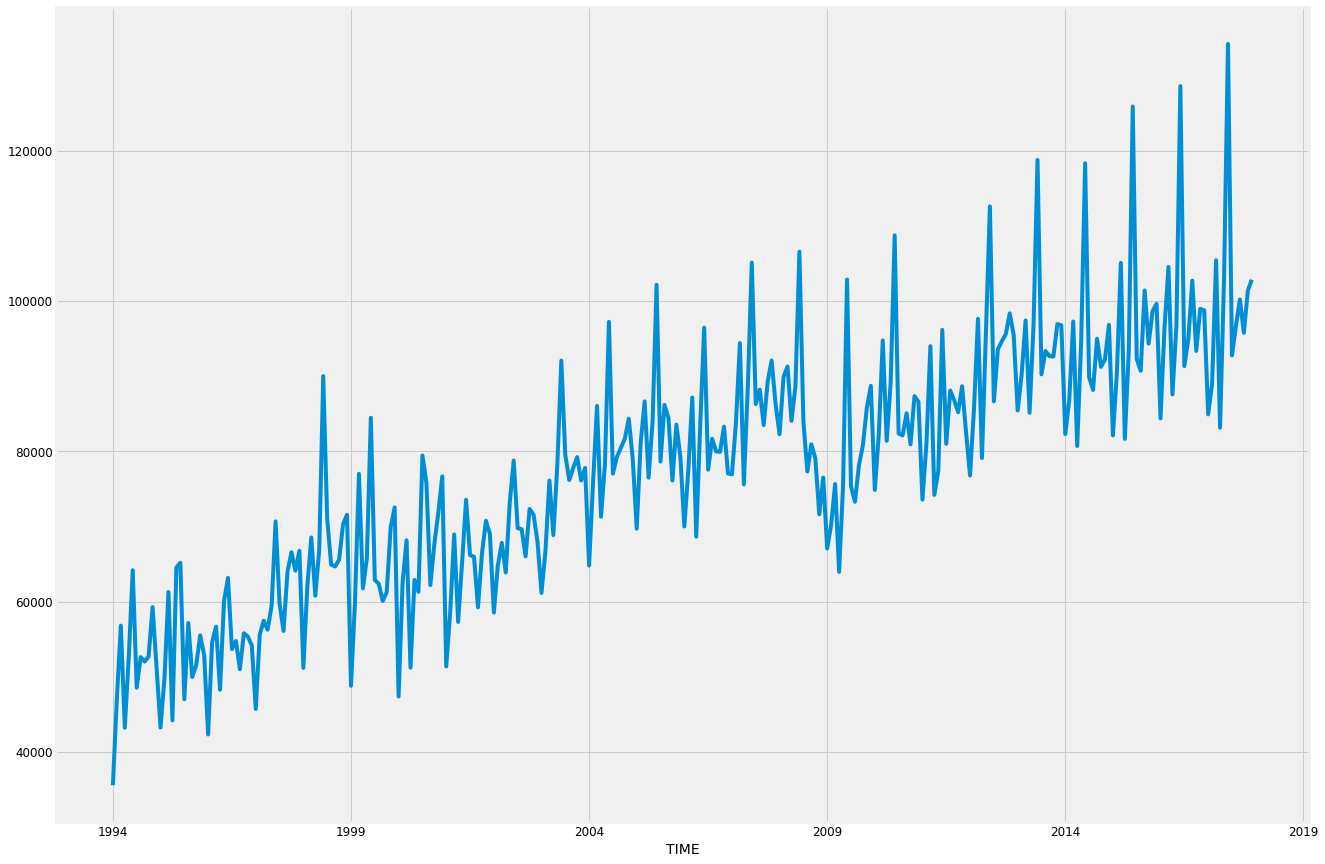

In [14]:
y = all_cars_all_region['Value']

y.plot(figsize=(20, 15),x = None)
plt.show()

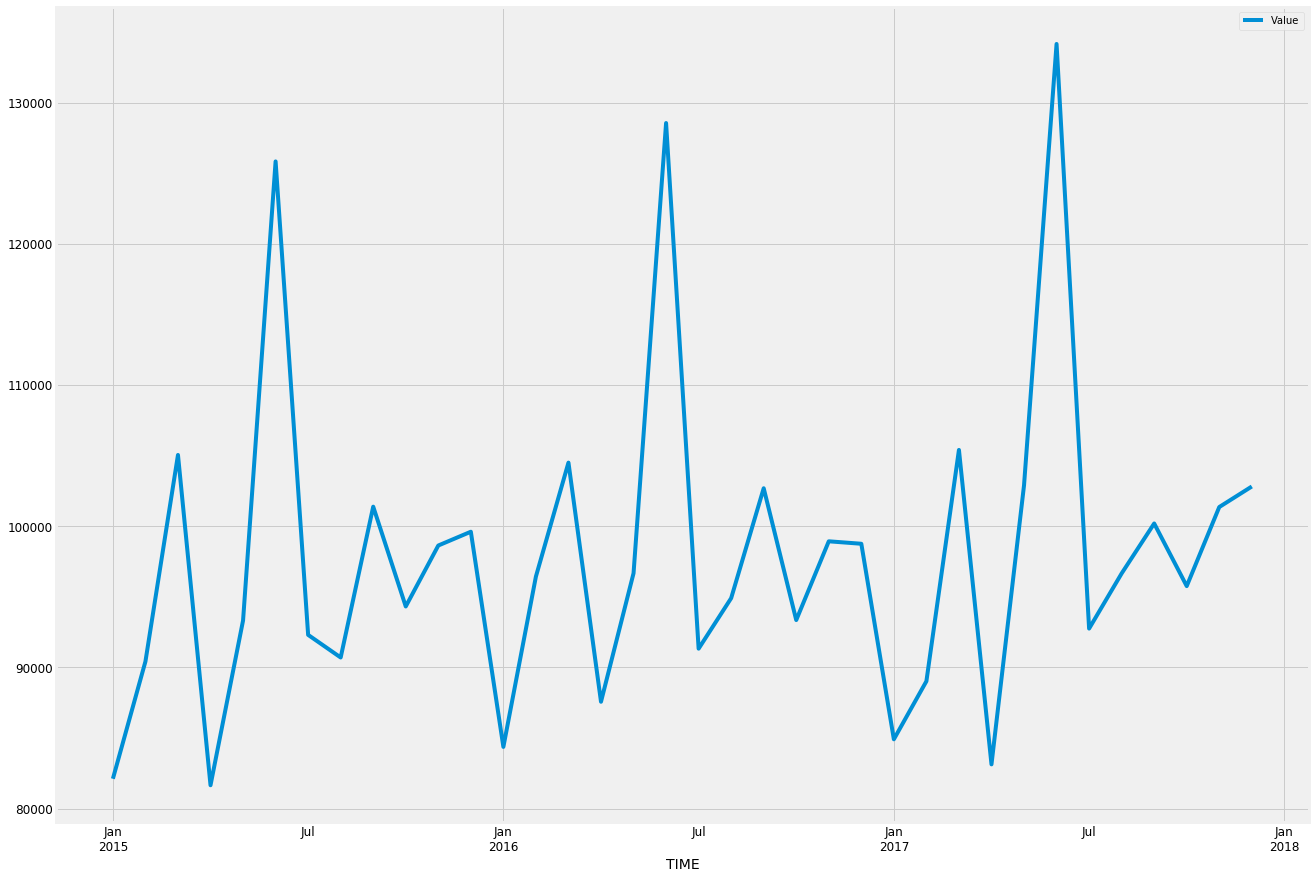

In [15]:
z = all_cars_all_region['2015-01':'2017-12']

z.plot(figsize = (20,15),x = None)
plt.show()

In [17]:
#12 seasons chosen per year due to the clear pattern of 12 distinctly different monthly patterns.
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [18]:
#initialise list to be able to hold results to make it easier to find the lowest result to find which model to use quicker
results_list = []
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            warnings.filterwarnings("ignore")
            results_list.append(results.aic)

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue
print("lowest result is " + str(min(results_list)))

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:7293.293369312979
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:6815.078143900661


/home/paul/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:5643.460985883648
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:5393.229683485892
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:5648.249615304498
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:5619.83710706473
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:5408.357711483104
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:5390.889959479369
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:7070.676989709407
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:6722.307461993595
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:5549.687148257799
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:5298.961945427468
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:6744.487690038421
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:6697.5946667617645
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:5340.107258081442
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:5300.355784227131
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:6180.9815862504765
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:5792.313461934212
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:5557.459124697066
ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:5274.329959463097
ARIMA(0, 

In [19]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(0, 1, 1),
                                seasonal_order=(0, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.6213      0.040    -15.501      0.000      -0.700      -0.543
ma.S.L12      -0.5424      0.048    -11.297      0.000      -0.636      -0.448
sigma2      2.939e+07   4.56e-10   6.44e+16      0.000    2.94e+07    2.94e+07


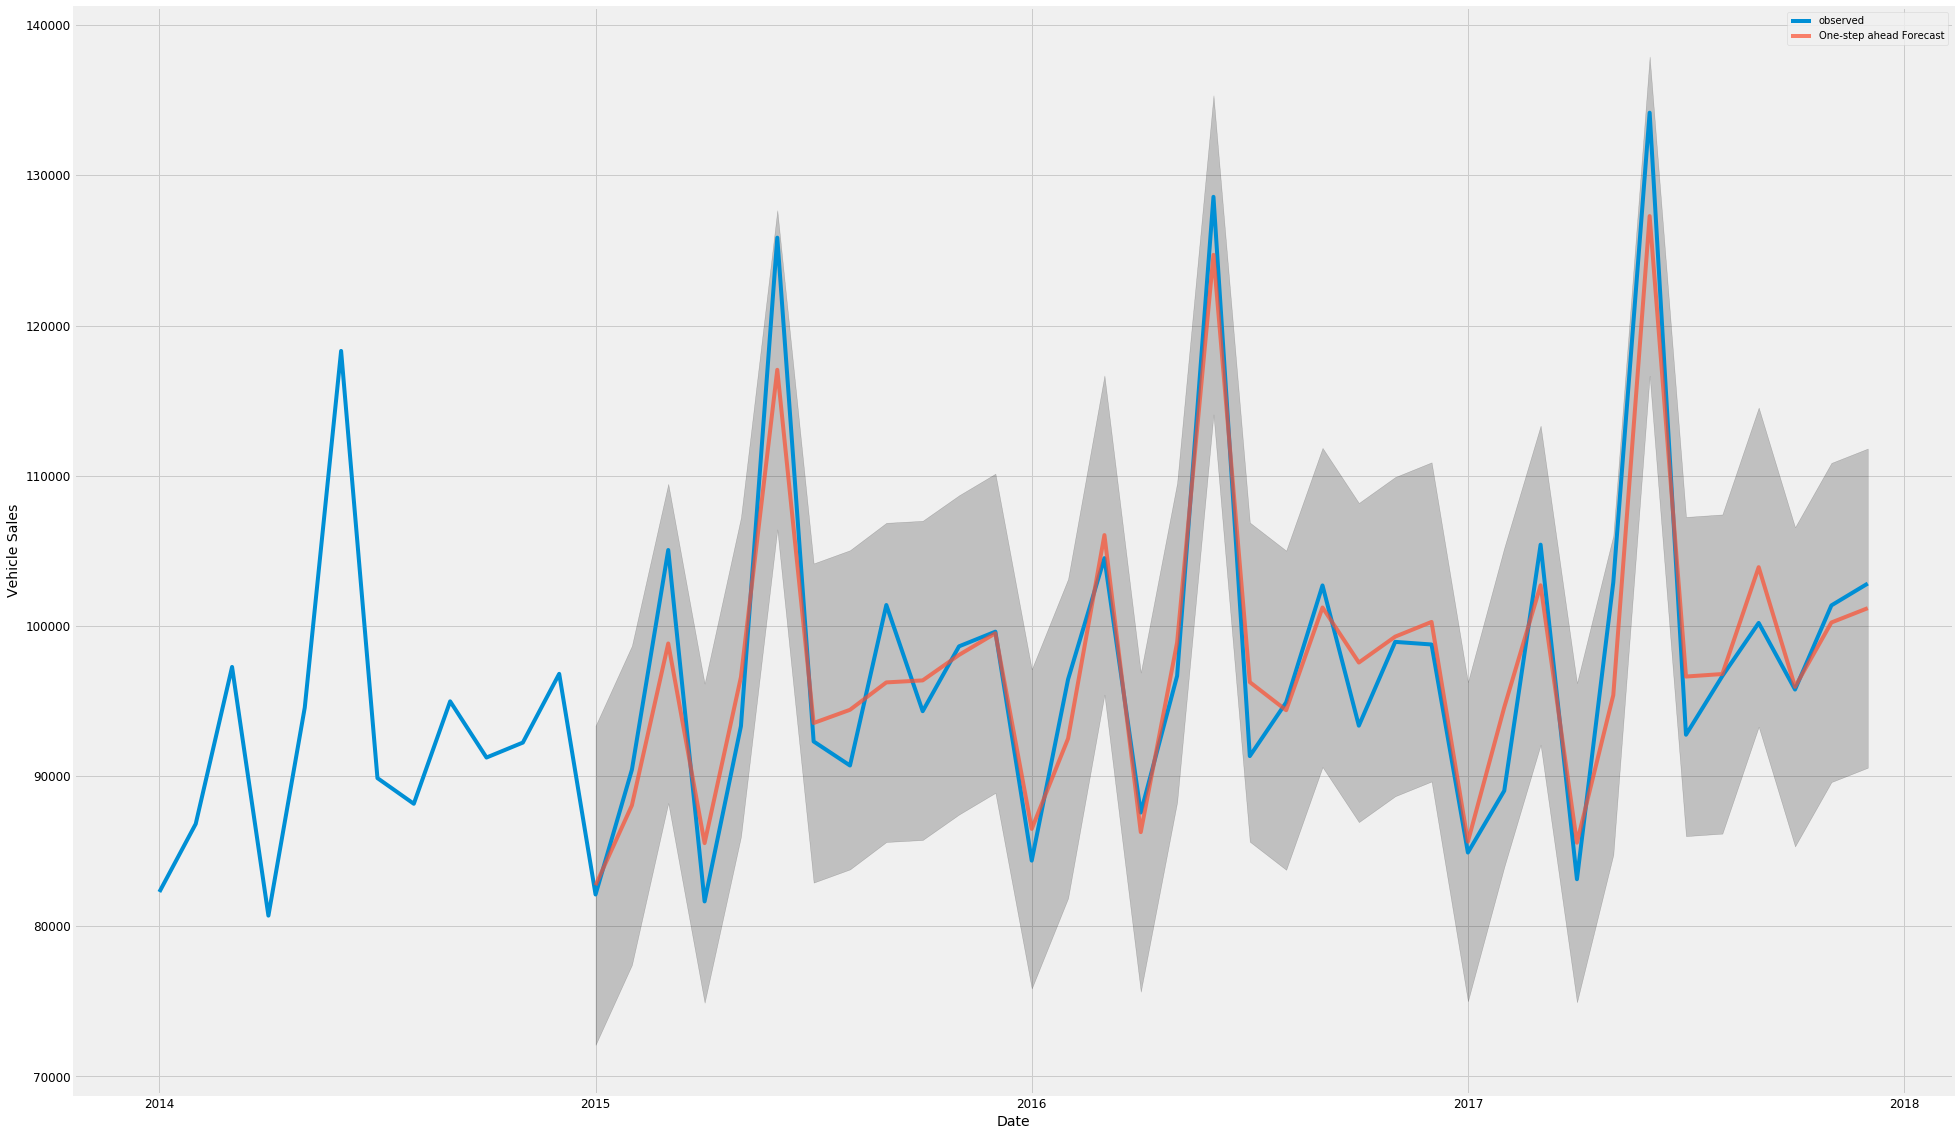

In [21]:
pred = results.get_prediction(start=pd.to_datetime('2015-01-01'), dynamic=False)

pred_ci = pred.conf_int()

ax = y['2014':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(30, 20))

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('Vehicle Sales')
plt.legend()

plt.show()

In [22]:
y_forecasted = pred.predicted_mean
y_truth = y['2015-01':]


mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse),2)))

The Mean Squared Error of our forecasts is 12947625.33
The Root Mean Squared Error of our forecasts is 3598.28


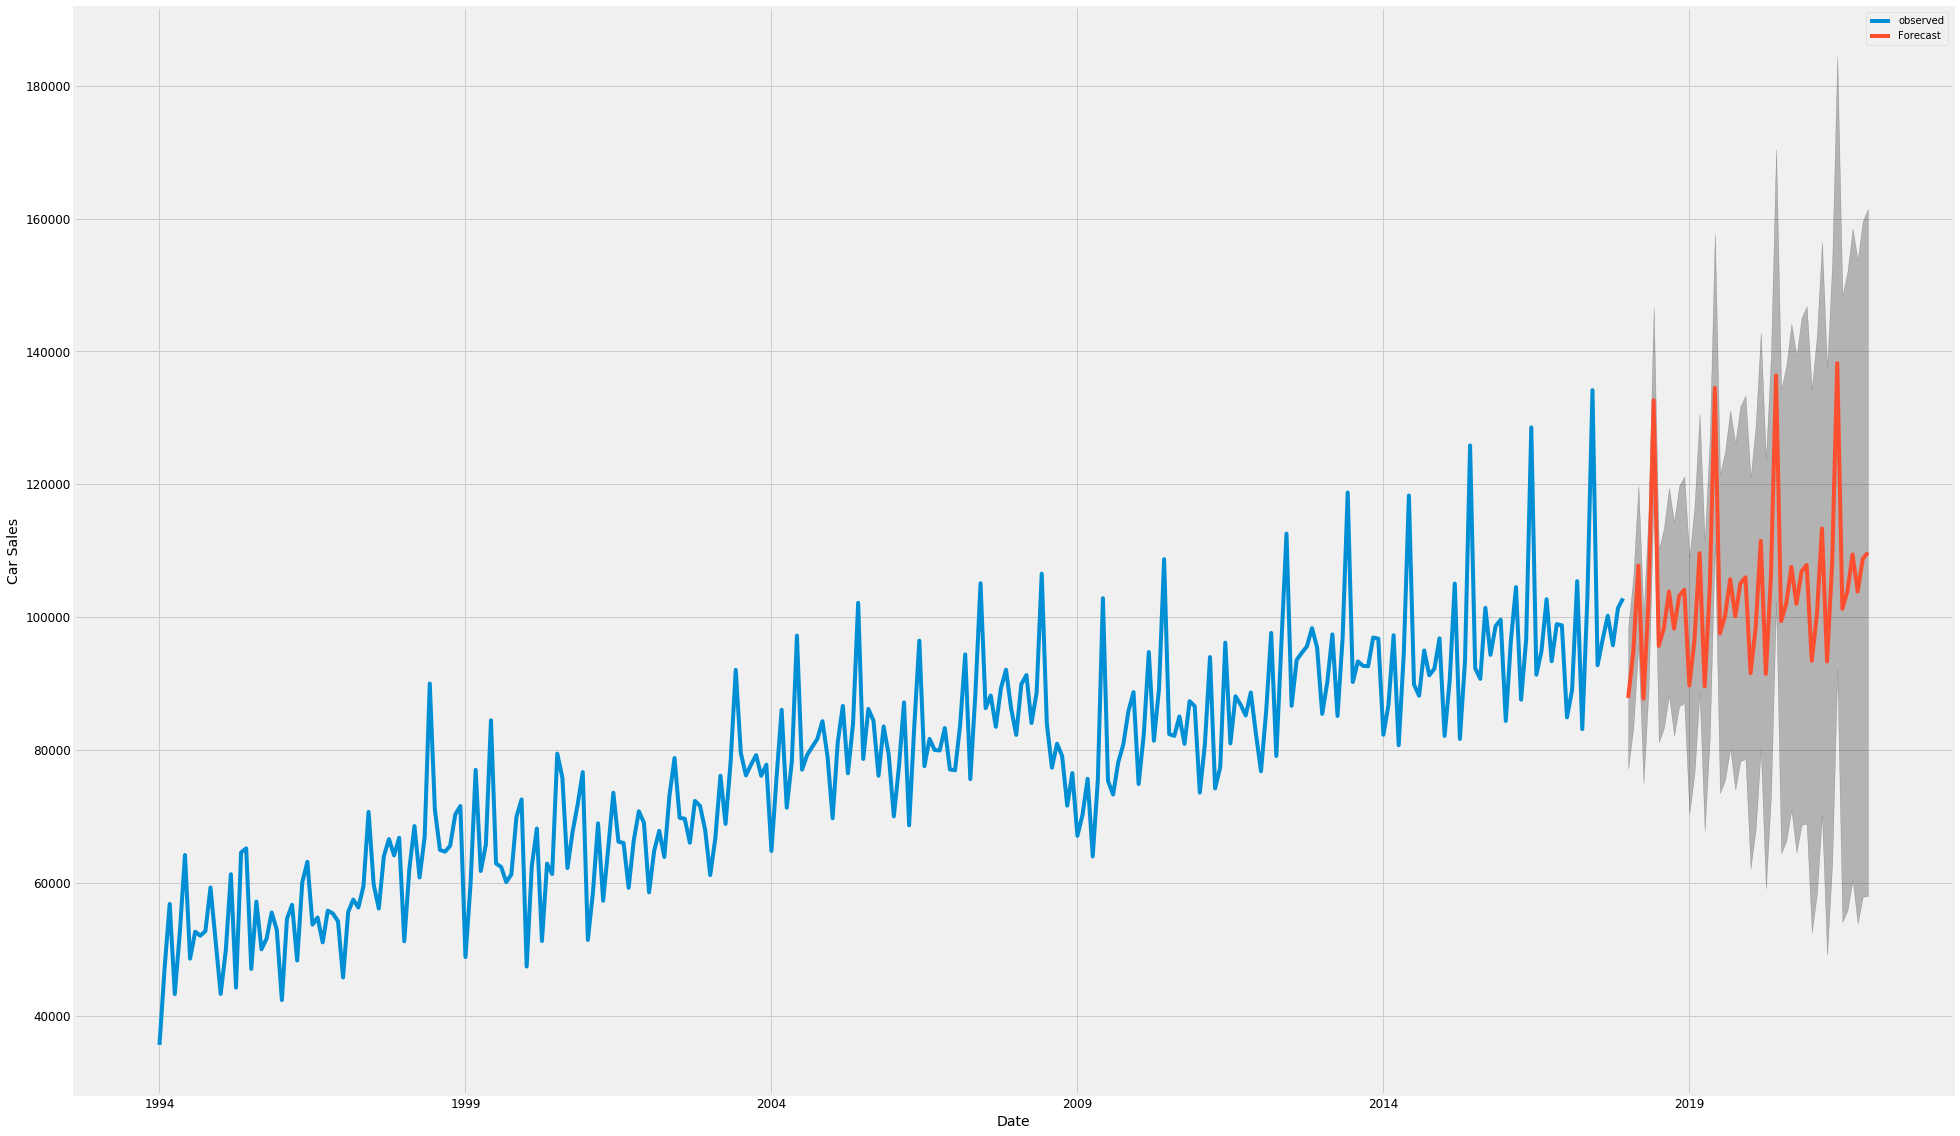

In [24]:
pred_uc = results.get_forecast(steps = 48)
pred_ci = pred_uc.conf_int()

ax = y.plot(label = 'observed', figsize = (30, 20))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color = 'k', alpha = .25)
ax.set_xlabel('Date')
ax.set_ylabel('Car Sales')


plt.legend()
plt.show()

In [25]:
pred_uc2 = results.get_forecast(steps = 10)
prediction = pred_uc2.predicted_mean
prediction.to_csv("2018forecast.xls")

In [26]:
prediction = pd.read_csv("2018forecast.xls", header = None)
prediction.columns = ['Time', 'Value']


print('2018 Prediction \n')
print(prediction)
prediction.to_csv("2018forecast.xls")


print('\n \n')
print('2018 YTD actual data \n')
df2 = pd.read_excel("2018YTD.xls")
print(df2)


2018 Prediction 

         Time          Value
0  2018-01-01   87835.521780
1  2018-02-01   94719.598479
2  2018-03-01  107766.389743
3  2018-04-01   87720.943587
4  2018-05-01  102595.203293
5  2018-06-01  132661.717537
6  2018-07-01   95666.385156
7  2018-08-01   98341.484265
8  2018-09-01  103847.180318
9  2018-10-01   98256.828271

 

2018 YTD actual data 

        TIME   Value
0 2018-01-01   88551
1 2018-02-01   95999
2 2018-03-01  106988
3 2018-04-01   82930
4 2018-05-01  100754
5 2018-06-01  130300
6 2018-07-01   85551
7 2018-08-01   95221
8 2018-09-01   94711
9 2018-10-01   90718


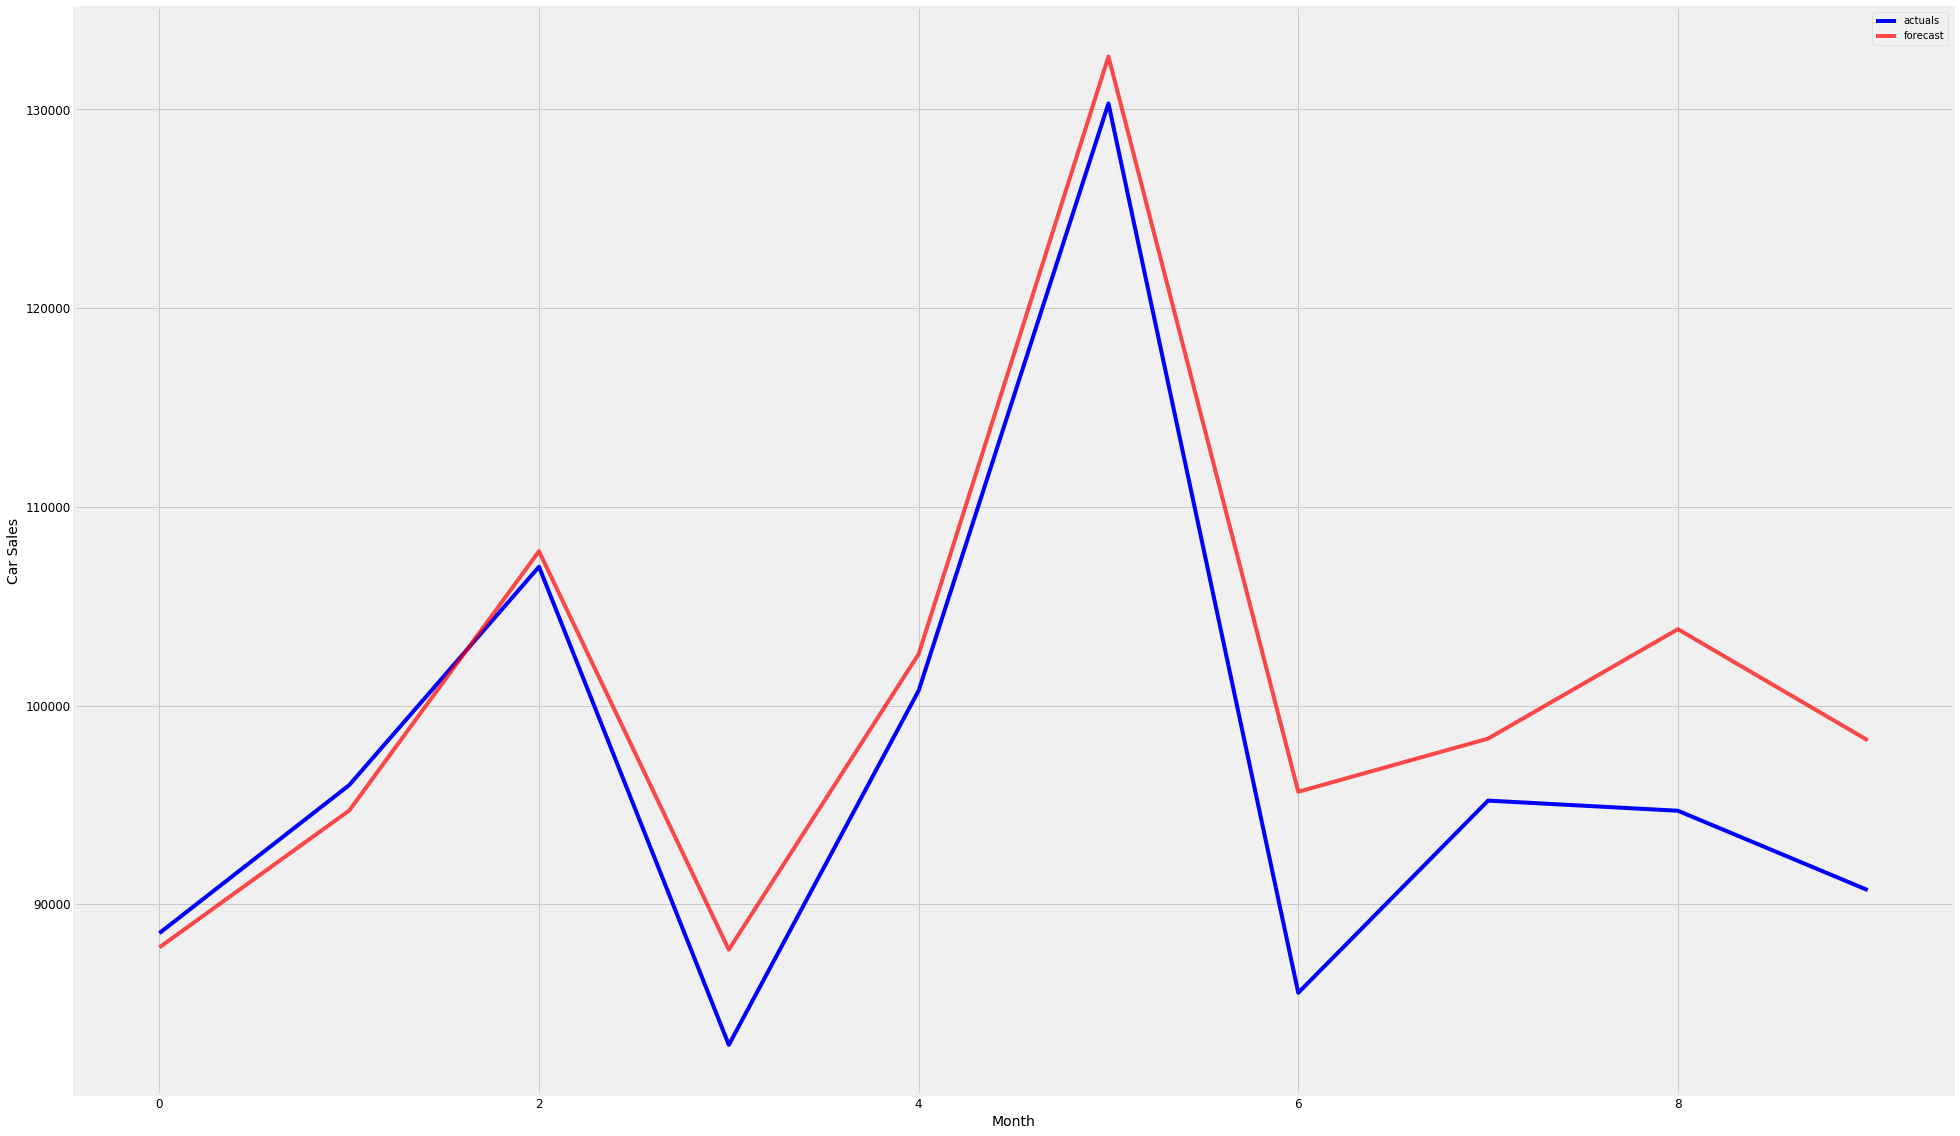

In [27]:
prediction = pd.read_csv("2018forecast.xls")
ax = df2['Value'].plot(label = 'actuals', figsize = (30,20), color = 'b')
prediction['Value'].plot(ax = ax, label = 'forecast',color = 'r', alpha = 0.7, figsize = (30, 20))

ax.set_xlabel('Month')
ax.set_ylabel('Car Sales')

plt.legend()
plt.show()

In [28]:
prediction_total = int(prediction['Value'].sum())
actuals_total = round(df2['Value'].sum(), 2)
variance = round(prediction_total - actuals_total, 2)
variance_percentage = round(((prediction_total / actuals_total) - 1) * 100, 2)
print('total prediction YTD for 2018 was ' + str(prediction_total))
print('total actuals YTD for 2018 was ' + str(actuals_total))
print('total variance is ' + str(variance) + ' or ' + str(variance_percentage) + '%')

total prediction YTD for 2018 was 1009411
total actuals YTD for 2018 was 971723
total variance is 37688 or 3.88%


In [29]:
prediction_4_year = pd.DataFrame(pred_uc.predicted_mean)
prediction_4_year.to_csv("4_year_forecast_all.xls")

In [30]:
prediction_4_year = pd.read_csv("4_year_forecast_all.xls")
prediction_4_year.columns = ['TIME', 'Value']
print('4 Year Prediction \n')

print(prediction_4_year)
prediction_4_year.to_csv("4_year_forecast_all.xls")

4 Year Prediction 

          TIME          Value
0   2018-01-01   87835.521780
1   2018-02-01   94719.598479
2   2018-03-01  107766.389743
3   2018-04-01   87720.943587
4   2018-05-01  102595.203293
5   2018-06-01  132661.717537
6   2018-07-01   95666.385156
7   2018-08-01   98341.484265
8   2018-09-01  103847.180318
9   2018-10-01   98256.828271
10  2018-11-01  103181.269135
11  2018-12-01  104130.896814
12  2019-01-01   89698.643506
13  2019-02-01   96582.720205
14  2019-03-01  109629.511469
15  2019-04-01   89584.065313
16  2019-05-01  104458.325018
17  2019-06-01  134524.839263
18  2019-07-01   97529.506882
19  2019-08-01  100204.605991
20  2019-09-01  105710.302044
21  2019-10-01  100119.949997
22  2019-11-01  105044.390861
23  2019-12-01  105994.018540
24  2020-01-01   91561.765232
25  2020-02-01   98445.841931
26  2020-03-01  111492.633195
27  2020-04-01   91447.187039
28  2020-05-01  106321.446744
29  2020-06-01  136387.960989
30  2020-07-01   99392.628608
31  2020-08-01  1020